In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Feature Selection

(303, 14)
     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
164    4      2       1  
(302, 14)


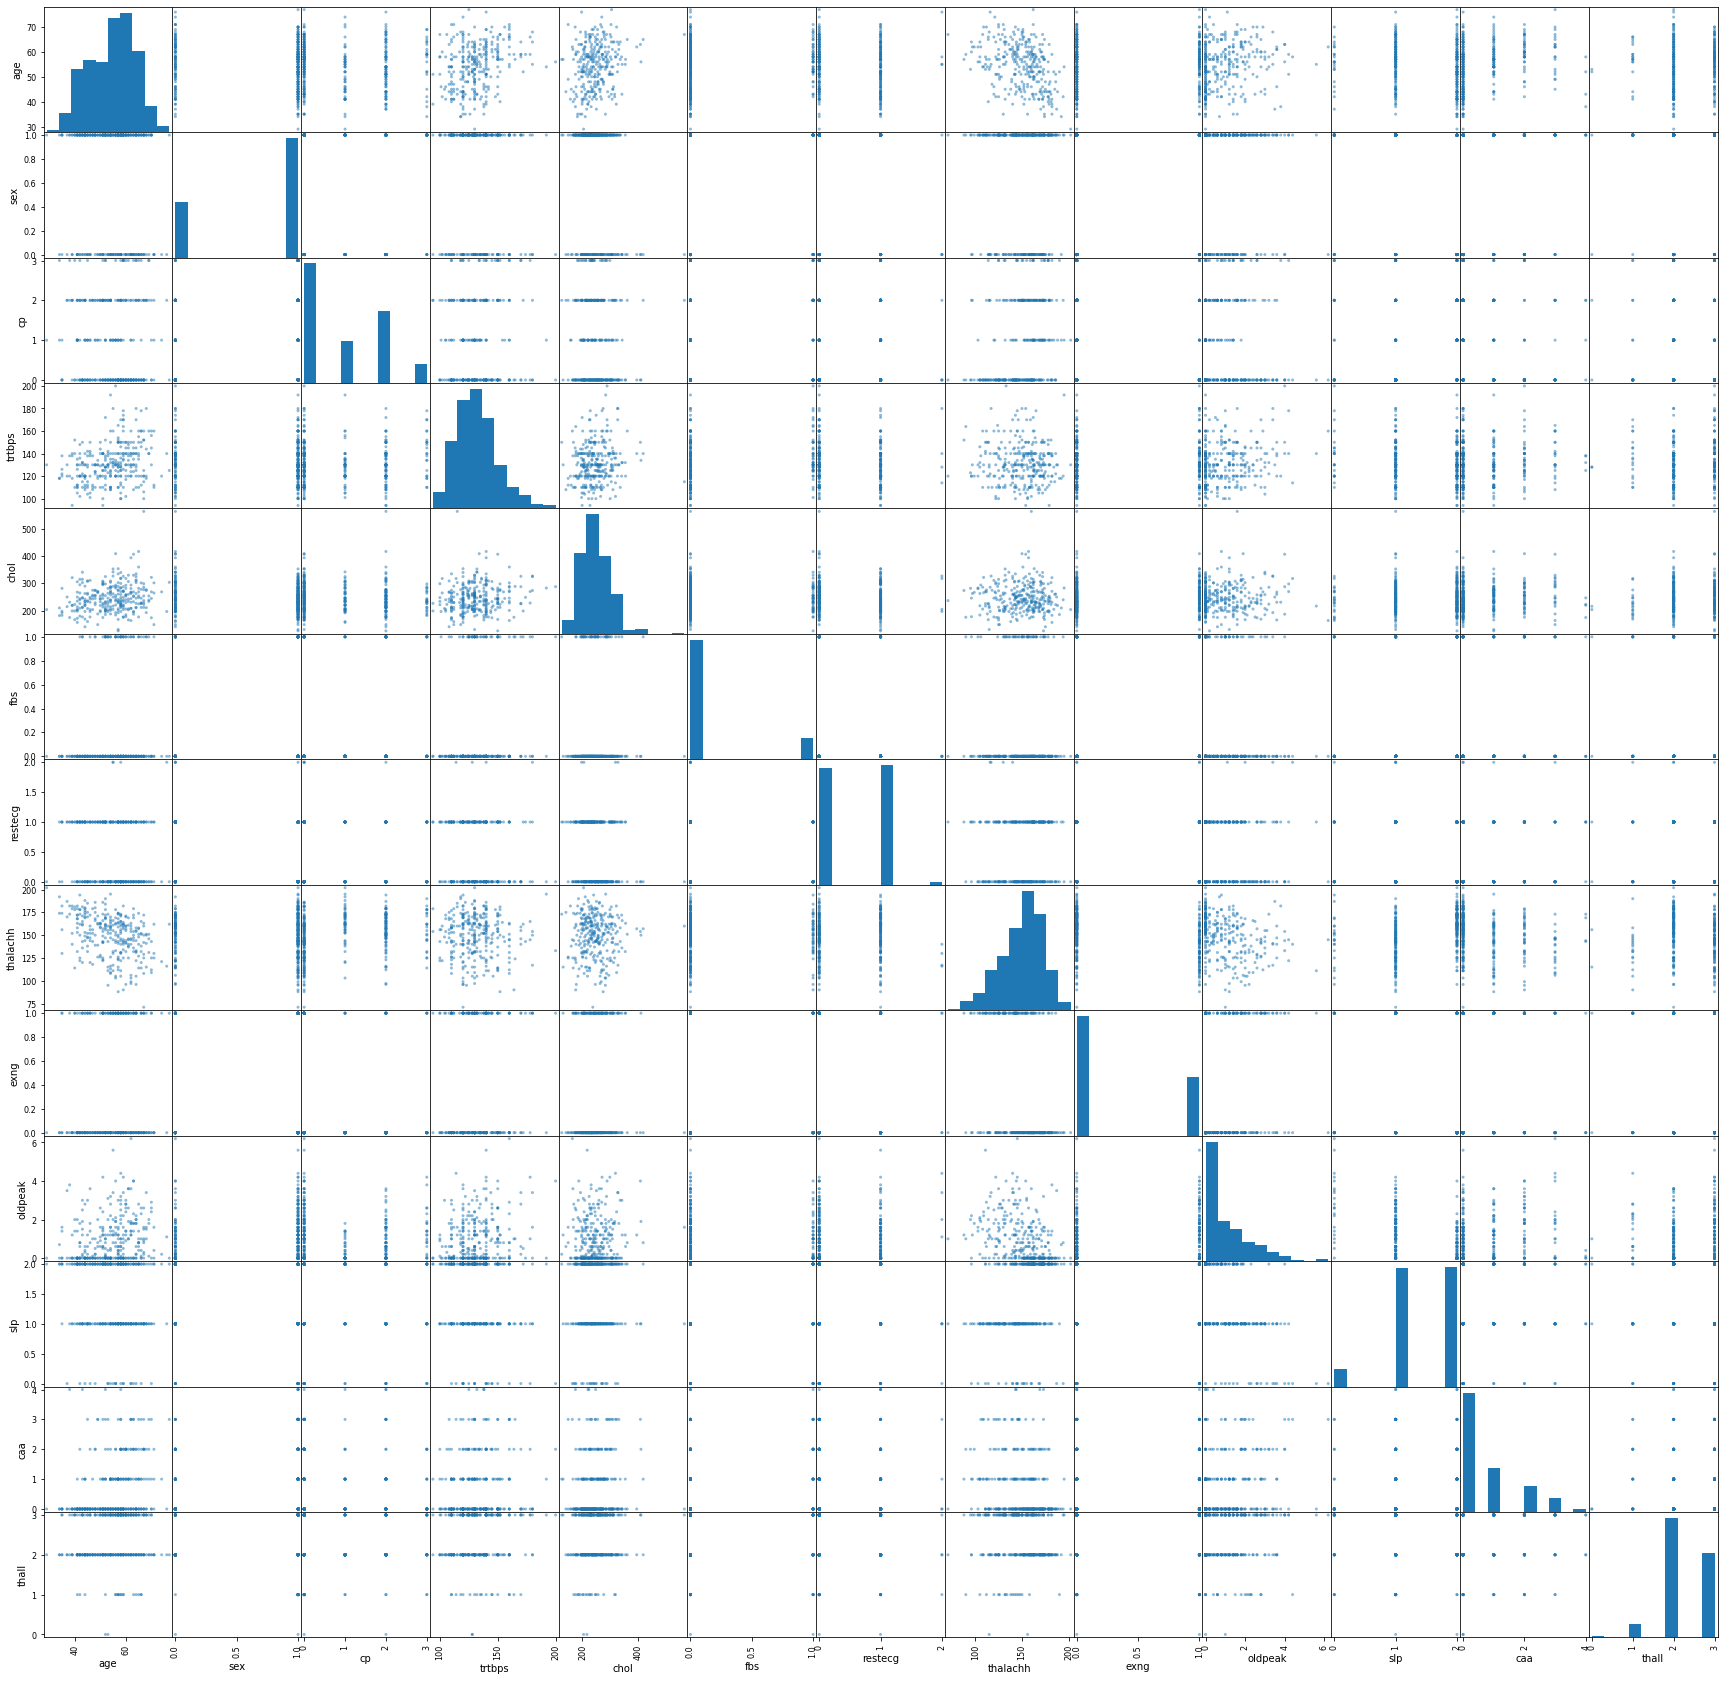

In [2]:
dataset = pd.read_csv(r"C:\Users\andy\OneDrive\Desktop\GradDipSA52\SA4108 Paper5\CA\Dataset\heart.csv")
print(dataset.shape)
repeated = dataset[dataset.duplicated()]
print(repeated)
dataset = dataset.drop(index=164)
print(dataset.shape)
data_for_matrix = dataset.iloc[:,:-1]
scatter_matrix(data_for_matrix, figsize=(30,30))
plt.show()

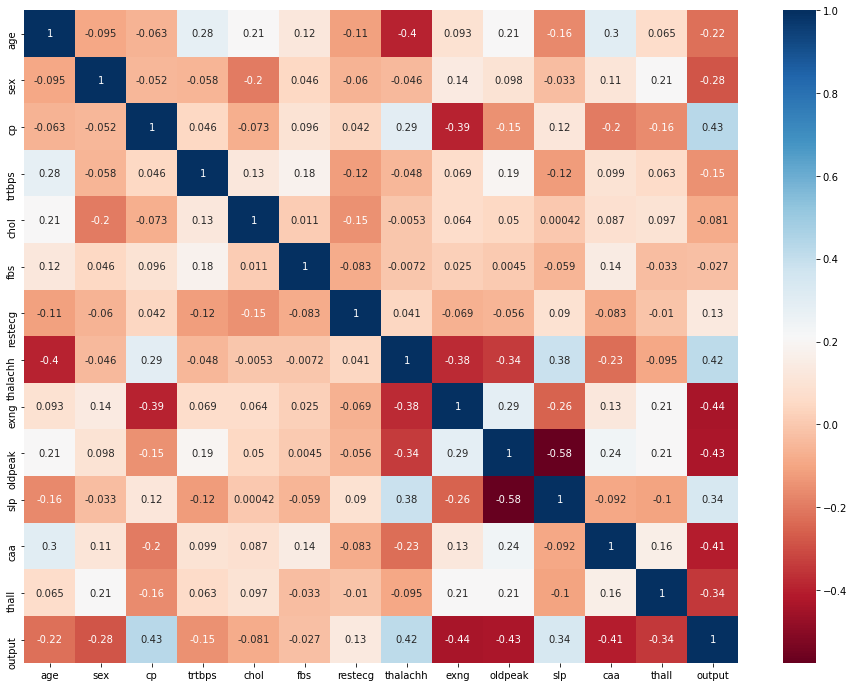

In [3]:
corr_mat = dataset.corr()
plt.figure(figsize =(16,12))
sb.heatmap(data=corr_mat, annot=True, cmap="RdBu")
plt.show()
#Not removing any data as all data does not show a strong positive or negative correlation with target

# Feature Extraction

In [36]:
x = dataset.iloc[:,:-1]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
number_components = []
sum_variance = []
k = []
k_value =[]
scores = []
max_s = []

for i in range(2, 14, 1):
    number_components.append(i)
    pca = PCA(n_components = i)
    new_features = pca.fit_transform(x_scaled)
    #print(pca.explained_variance_ratio_)
    sum_variance.append(pca.explained_variance_ratio_.sum())

    X = pd.DataFrame(new_features)
    y = dataset["output"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)
    #print(X_train.shape)
    #X_train.head()

    for j in range(3, 60 ,2):
        knn_model = KNeighborsClassifier(n_neighbors = j)
        knn_model.fit(X_train, y_train)
        y_pred = knn_model.predict(X_test)
        k.append(j)
        scores.append(accuracy_score(y_test, y_pred))

    max_score = max(scores)
    max_s.append(max_score)
    index = scores.index(max_score)
    ideal_k = k[index]
    k_value.append(ideal_k)
    print("Number of Components:", i)
    print("Variance Sum: ", pca.explained_variance_ratio_.sum())
    print("Max accuracy:", max_score)
    print("Best k:", ideal_k, "\n")


Number of Components: 2
Variance Sum:  0.33172957822141047
Max accuracy: 0.881578947368421
Best k: 13 

Number of Components: 3
Variance Sum:  0.42532776498726355
Max accuracy: 0.881578947368421
Best k: 13 

Number of Components: 4
Variance Sum:  0.5165387858010212
Max accuracy: 0.881578947368421
Best k: 13 

Number of Components: 5
Variance Sum:  0.5952421947712336
Max accuracy: 0.881578947368421
Best k: 13 

Number of Components: 6
Variance Sum:  0.6698020370728348
Max accuracy: 0.881578947368421
Best k: 13 

Number of Components: 7
Variance Sum:  0.7363443390715393
Max accuracy: 0.8947368421052632
Best k: 11 

Number of Components: 8
Variance Sum:  0.7963076760082377
Max accuracy: 0.9210526315789473
Best k: 9 

Number of Components: 9
Variance Sum:  0.8506330542579448
Max accuracy: 0.9210526315789473
Best k: 9 

Number of Components: 10
Variance Sum:  0.8985124980075502
Max accuracy: 0.9210526315789473
Best k: 9 

Number of Components: 11
Variance Sum:  0.9389638408028305
Max accura

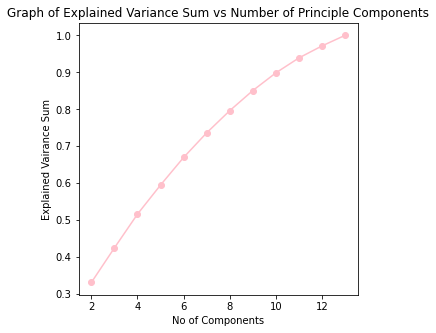

In [16]:
plt.figure(figsize=(5,5))
plt.plot(number_components, sum_variance, marker="o", color="pink")
plt.title("Graph of Explained Variance Sum vs Number of Principle Components")
plt.xlabel("No of Components")
plt.ylabel("Explained Vairance Sum")
plt.show()

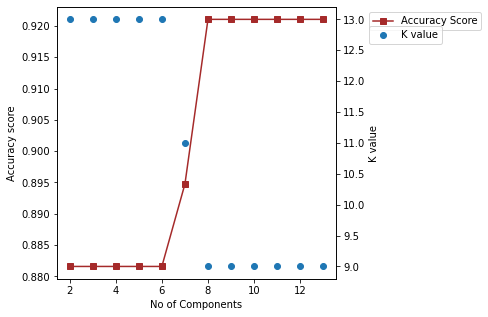

In [75]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(number_components, max_s, marker="s", color="brown", label="Accuracy Score")
ax2 = ax.twinx()
ax2.scatter(number_components, k_value, label="K value")
ax.set_xlabel("No of Components")
ax.set_ylabel("Accuracy score")
ax2.set_ylabel("K value")
ax.legend(bbox_to_anchor=(1.1, 1), loc='upper left')
ax2.legend(bbox_to_anchor=(1.1, 0.95), loc='upper left')
plt.show()

In [52]:
pca = PCA(n_components = 8)
new_features = pca.fit_transform(x_scaled)
#print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

X = pd.DataFrame(new_features)
y = dataset["output"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)
#print(X_train.shape)
#X_train.head()

knn_model = KNeighborsClassifier(n_neighbors = 9)
start_train = int(round(time.time()*1000))
knn_model.fit(X_train, y_train)
end_train = int(round(time.time()*1000))

start_test = int(round(time.time()*1000)) 
y_pred = knn_model.predict(X_test)
end_test = int(round(time.time()*1000))
print(accuracy_score(y_test, y_pred))


0.7963076760082377
0.9210526315789473


In [53]:
#How to do input data for prediction? How to convert my data to the new PCA features?
data = [[55, 0, 1, 132, 342, 0, 1, 166, 0, 1.2, 2, 0, 2]] #output: 1
data_scaled = scaler.transform(data)

data_new_features = pca.transform(data_scaled)
result = knn_model.predict(data_new_features)
print(result)

[1]


In [54]:
print("Training time:", end_train - start_train, "ms")
print("Prediction time:", end_test - start_test, "ms")

Training time: 1 ms
Prediction time: 3 ms
